# Cardinality constrained portfolio optimization

### Import libraries

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SCIP solver can be installed with `conda install -c conda-forge pyscipopt` or `pip install pyscipopt`.

In [3]:
from pyscipopt.scip import Model

In [4]:
np.random.seed(940932)

In [6]:
print(cp.installed_solvers())

(CVXPY) May 26 06:59:09 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')
['CPLEX', 'ECOS', 'ECOS_BB', 'GUROBI', 'SCIP', 'SCIPY', 'SCS']


### Generate random data for 10 stocks

In [7]:
# Random data for 10 stocks
n = 10
Q = np.random.random((n,n))
Q = np.dot(Q,Q.T)/1000
# Q
mu = np.random.rand(n) / 100
# mu

### Cardinality constrained mean-variance optimization problem

\begin{equation}
 \begin{array}{rll}
  \displaystyle \min_{w,z} & w^T Q w \\
  \mbox{s.t.} & \sum_{i=1}^n w_i = 1 \\
  & \sum_{i=1}^n z_i = K \\
  & l \cdot z \leq w \leq u \cdot z \\
  & z = \{0,1\}
 \end{array}
\end{equation}

### Define and solve model using CVXPY modeling environment

Compute minimum variance portfolio with cardinality $K=2$

In [8]:
w = cp.Variable(n)
z = cp.Variable(n, boolean=True)
K = cp.Parameter()
K.value = 2
prob = cp.Problem(cp.Minimize(cp.quad_form(w, Q)),
                 [sum(w) == 1,
                  sum(z) == K,
                  w - z <= 0,
                  w >= 0])
prob.solve(solver='SCIP', verbose=True)

print("\nSolution status: ", prob.status)
print("Solution optimal value: ", prob.value)
print("Solution w: ")
print(w.value)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 26 06:59:24 PM: Your problem has 20 variables, 4 constraints, and 1 parameters.
(CVXPY) May 26 06:59:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 26 06:59:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 26 06:59:24 PM: Compiling problem (target solver=SCIP).
(CVXPY) May 26 06:59:24 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCIP
(CVXPY) May 26 06:59:24 PM: Applying reduction Dcp2Cone
(CVXPY) May 26 06:59:24 PM: Applying reduction CvxAttr2Constr
(CVXPY) 

In [9]:
w_minVar = w.value
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar))
print("Minimum variance portfolio with cardinality K=2:\n")
print("Solution status =", prob.status)
print("Solution value =", prob.value)
print("Variance       =", var_minVar)
print("Standard deviation =", np.sqrt(var_minVar))

Minimum variance portfolio with cardinality K=2:

Solution status = optimal
Solution value = 0.0020103453840062424
Variance       = 0.0020103453840062424
Standard deviation = 0.044836875270320105


Compute minimum variance portfolios with cardinality $K=1,2,...,10$

In [10]:
w_cardP = []
var_cardP = []
p_cardP = []
for card in range(1,n+1):
    K.value = card
    p_cardP.append(card)
    prob.solve(verbose=False)
    w_cardP.append(w.value)
    var_cardP.append(np.dot(w.value, np.dot(Q, w.value)))

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-11


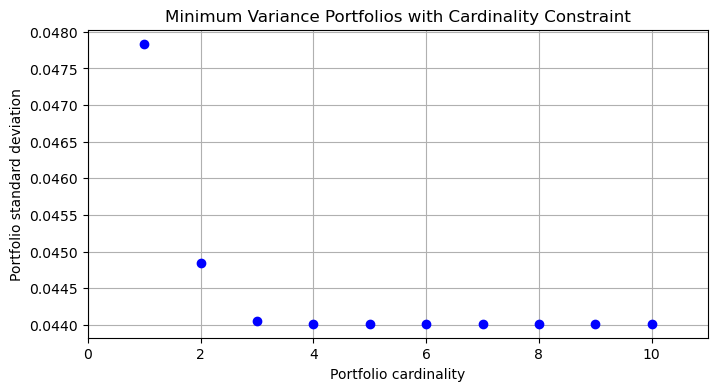

In [11]:
fig=plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.plot(p_cardP, np.sqrt(var_cardP), 'bo')

ax.set_xlim([0,n+1])
ax.set_xlabel('Portfolio cardinality')
ax.set_ylabel('Portfolio standard deviation')
plt.title('Minimum Variance Portfolios with Cardinality Constraint')
ax.grid()
plt.show()

In [12]:
w_cardP

[array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0.        , 0.        , 0.        , 0.67151809, 0.32848191,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.        , 0.        , 0.        , 0.50808798, 0.27805418,
        0.        , 0.21385784, 0.        , 0.        , 0.        ]),
 array([0.07658429, 0.        , 0.        , 0.51981324, 0.24055557,
        0.        , 0.16304689, 0.        , 0.        , 0.        ]),
 array([0.07658429, 0.        , 0.        , 0.51981324, 0.24055557,
        0.        , 0.16304689, 0.        , 0.        , 0.        ]),
 array([0.07658429, 0.        , 0.        , 0.51981324, 0.24055557,
        0.        , 0.16304689, 0.        , 0.        , 0.        ]),
 array([0.07658429, 0.        , 0.        , 0.51981324, 0.24055557,
        0.        , 0.16304689, 0.        , 0.        , 0.        ]),
 array([0.07658429, 0.        , 0.        , 0.51981324, 0.24055557,
        0.        , 0.16304689, 0.        , 0.        